<a href="https://colab.research.google.com/github/Rotha-Vichet/ML-finalProject/blob/main/Support_Vector(SVM1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# !pip install seaborn

https://hands-on.cloud/implementation-of-support-vector-machine-svm-using-python/

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
import seaborn as sns

In [ ]:
# from google.colab import files 
# file = files.upload()

In [ ]:
# import dataset
dataset = pd.read_csv("https://hands-on.cloud/wp-content/uploads/2022/01/customer_purchases.csv")
dataset.head(10)

,Age,Salary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
5,27,58000,0
6,27,84000,0
7,32,150000,1
8,25,33000,0
9,35,65000,0


In [ ]:
# split the data into input and outputs
# x_input = dataset.iloc[:, [0,1]].values
# y_output = dataset.iloc[:,2].values

# print(x_input.shape)
# print(y_output.shape)

In [ ]:
dataset.columns

Index(['Age', 'Salary', 'Purchased'], dtype='object')

In [ ]:
dataset.isnull().sum()

Age          0
Salary       0
Purchased    0
dtype: int64

In [ ]:
# split or assign columns as the input and output 
x_input = ["Age","Salary"]
y_output = ["Purchased"]

# reshape 
x = dataset[x_input].values.reshape(-1,2)
y = dataset[y_output].values.reshape(-1,1)

print(x.shape)
print(y.shape)

(400, 2)
(400, 1)


In [ ]:
!pip install chart_studio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 64 kB 3.0 MB/s 
  Created wheel for retrying: filename=retrying-1.3.3-py3-none-any.whl size=11447 sha256=9b5beeb0405c57bf9f9d7f64fc8932f1a5ad41ba3cd7155228605698bf102421
  Stored in directory: /root/.cache/pip/wheels/f9/8d/8d/f6af3f7f9eea3553bc2fe6d53e4b287dad18b06a861ac56ddf
Successfully built retrying


In [ ]:
# import the require module for data visualization
import chart_studio.plotly as py
import plotly.graph_objects as go 
import plotly.offline as pyoff 

In [ ]:
# counting the total output data from purchased column
y_target = dataset['Purchased'].value_counts().reset_index()
print(y_target)

   index  Purchased
0      0        257
1      1        143


In [ ]:
# dividing the output class into two sections
target_class = go.Bar(
    name = "Target Balance",
    x = ['Not-Purchased', 'Purchased'],
    y = y_target["Purchased"]
)

# plotting the output class
fig = go.Figure(target_class)
pyoff.iplot(fig)

In [ ]:
# splitting data into training and testing 

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size= 0.25, random_state = 1)

print(x_train.shape)
print(x_test.shape)

(300, 2)
(100, 2)


In [ ]:
# scaling the dataset 
 
from sklearn.preprocessing import StandardScaler

# scaling the input data 
sc_x = StandardScaler()
x_train = sc_x.fit_transform(x_train)
x_test = sc_x.fit_transform(x_test)

print(x_train)
print(x_test)

[[-1.68062015e+00 -5.92416706e-01]
 [ 8.69241193e-01  5.63566526e-01]
 [-6.01832657e-01 -1.03702564e+00]
 [ 9.67312783e-01 -1.15558802e+00]
 [-2.09546297e-01 -5.62776110e-01]
 [ 1.82740063e-01  8.00691292e-01]
 [-4.05689477e-01  1.30458142e+00]
 [ 1.16345596e+00  5.04285335e-01]
 [ 7.71169603e-01  2.96801165e-01]
 [ 6.73098013e-01 -8.88822663e-01]
 [ 3.78883243e-01 -2.96010749e-01]
 [ 4.76954833e-01 -4.73854323e-01]
 [-2.09546297e-01  1.18957591e-01]
 [ 3.78883243e-01  8.93169951e-02]
 [-9.94119017e-01  8.00691292e-01]
 [-6.99904247e-01  1.39350321e+00]
 [ 3.78883243e-01 -5.03494919e-01]
 [ 3.78883243e-01 -5.03494919e-01]
 [-1.68062015e+00  3.85722952e-01]
 [ 8.69241193e-01 -8.29541472e-01]
 [-9.94119017e-01 -1.12594743e+00]
 [-2.09546297e-01  5.96763994e-02]
 [ 1.16345596e+00 -1.21486922e+00]
 [-2.09546297e-01  6.52488313e-01]
 [-1.34031173e-02  1.78238782e-01]
 [-5.03761067e-01  1.42314380e+00]
 [-1.11474707e-01  1.78238782e-01]
 [-1.68062015e+00  5.04285335e-01]
 [ 8.46684727e-02 -5

In [ ]:
# sc_y = StandardScaler()
# y_train = sc_y.fit_transform(y_train)

In [ ]:

# Training model 

# import SVM module 
from sklearn.svm import SVC

# kernal to be set linear as it is binary class
model = SVC(kernel = 'linear')

# training the model
model.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



SVC(kernel='linear')

In [ ]:
# Testing the model
y_predict = model.predict(x_test)
print(y_predict)

[0 0 0 1 0 0 0 1 0 1 0 0 0 1 1 1 1 0 0 1 0 1 1 0 0 0 1 1 0 1 0 0 0 1 0 0 0
 0 0 0 1 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 1 0 0 1 0 1 0 0 0
 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0]


In [ ]:
# accuracy 
from sklearn.metrics import accuracy_score

print(accuracy_score(y_test, y_predict))

0.77


In [ ]:
print(y_train.shape)

(300, 1)


Stackoverflow : Python will generate one index for each shape. To separate the wanted dimension you can set the unwanted dimension to zero

In [ ]:
y_train = y_train[:,0]
print(y_train.shape)

(300,)


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


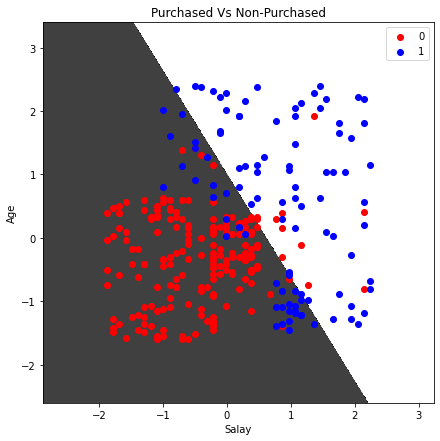

In [ ]:
# Linear classifier visulalization 

# importing the modules
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# plotting the fgiure
plt.figure(figsize = (7,7))

# assigning the input values
x_set, y_set = x_train, y_train

# ploting the linear graph
X1, X2 = np.meshgrid(np.arange(start = x_set[:, 0].min() - 1, stop = x_set[:, 0].max() + 1, step = 0.01), np.arange(start = x_set[:, 1].min() - 1, stop = x_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, model.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape), alpha = 0.75, cmap = ListedColormap(('black', 'white')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

# ploting scattered graph for the values
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1], c = ListedColormap(('red', 'blue'))(i), label = j)

# labeling the graph
plt.title('Purchased Vs Non-Purchased')
plt.xlabel('Salay')
plt.ylabel('Age')
plt.legend()
plt.show()

In [ ]:
print(y_test.shape)

(100, 1)


In [ ]:
y_test = y_test[:,0]
print(y_test.shape)

(100,)


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


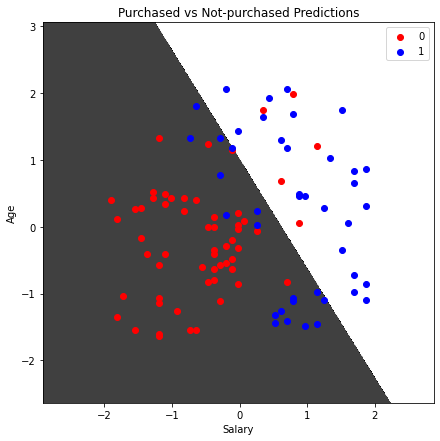

In [ ]:
# Visulizing the prediction 

# ploting graph of size 7,7
plt.figure(figsize = (7,7))

# assigning the testing dataset
x_set, y_set = x_test, y_test

# ploting the predicted graph
X1, X2 = np.meshgrid(np.arange(start = x_set[:, 0].min() - 1, stop = x_set[:, 0].max() + 1, step = 0.01),np.arange(start = x_set[:, 1].min() - 1, stop = x_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, model.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),alpha = 0.75, cmap = ListedColormap(('black', 'white')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

# plorting scattred graph for the testing values
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],c = ListedColormap(('red', 'blue'))(i), label = j)

# labelling the graphe
plt.title('Purchased vs Not-purchased Predictions')
plt.xlabel('Salary')
plt.ylabel('Age')
plt.legend()
plt.show()

In [ ]:
# Training and testing using Radial basis function kernel 

# importing SVM module
from sklearn.svm import SVC

# kernel to be set radial bf 
model1 = SVC(kernel='rbf')

# traininf the model
model1.fit(x_train, y_train)

# testing the model
y_pred = model1.predict(x_test)

# importing accuracy score
from sklearn.metrics import accuracy_score

# printing the accuracy of the model
print(accuracy_score(y_test, y_pred))

0.88


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


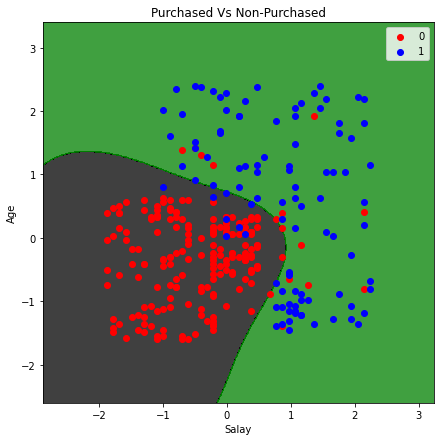

In [ ]:
# Visualizing Radial basis function kernel classifier

# plotting the fgiure
plt.figure(figsize = (7,7))

# assigning the input values
x_set, y_set = x_train, y_train

# ploting the linear graph
X1, X2 = np.meshgrid(np.arange(start = x_set[:, 0].min() - 1, stop = x_set[:, 0].max() + 1, step = 0.01), np.arange(start = x_set[:, 1].min() - 1, stop = x_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, model1.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape), alpha = 0.75, cmap = ListedColormap(('black', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

# ploting scattered graph for the values
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1], c = ListedColormap(('red', 'blue'))(i), label = j)

# labeling the graph
plt.title('Purchased Vs Non-Purchased')
plt.xlabel('Salay')
plt.ylabel('Age')
plt.legend()
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


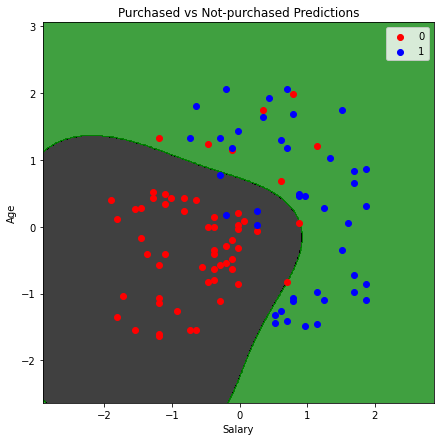

In [ ]:
# Visualizing the prediction using rbf
# ploting graph of size 7,7
plt.figure(figsize = (7,7))

# assigning the testing dataset
x_set, y_set = x_test, y_test

# ploting the predicted graph
X1, X2 = np.meshgrid(np.arange(start = x_set[:, 0].min() - 1, stop = x_set[:, 0].max() + 1, step = 0.01),np.arange(start = x_set[:, 1].min() - 1, stop = x_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, model1.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),alpha = 0.75, cmap = ListedColormap(('black', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

# plorting scattred graph for the testing values
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],c = ListedColormap(('red', 'blue'))(i), label = j)

# labelling the graphe
plt.title('Purchased vs Not-purchased Predictions')
plt.xlabel('Salary')
plt.ylabel('Age')
plt.legend()
plt.show()

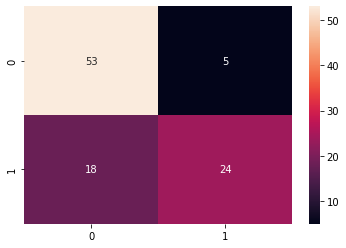

In [ ]:
# evaluation using confusion matric for binary classification 

from sklearn.metrics import confusion_matrix

confusion_m = confusion_matrix(y_test, y_predict, labels = model.classes_)

# true write  data values in each cells of the matrix
sns.heatmap(confusion_m, annot = True)
plt.savefig('confusion.png')

In [ ]:
# classification report 
# importing classification report
from sklearn.metrics import classification_report

# printing the report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.86      0.89        58
           1       0.83      0.90      0.86        42

    accuracy                           0.88       100
   macro avg       0.88      0.88      0.88       100
weighted avg       0.88      0.88      0.88       100



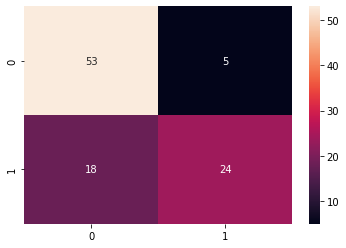

In [ ]:
# Confusion matrix for binary classification
# importing the required modules
import seaborn as sns
from sklearn.metrics import confusion_matrix

# passing actual and predicted values
cm = confusion_matrix(y_test, y_predict, labels=model.classes_)

# true Write data values in each cell of the matrix
sns.heatmap(cm, annot=True)
plt.savefig('confusion.png')

**SVM algorithm for multiclass classification using Python**